# Assignment

## Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

In [2]:
# Load the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [25]:
# Define k-means
kmeans_cluster = KMeans(n_clusters=6, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

48.9 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


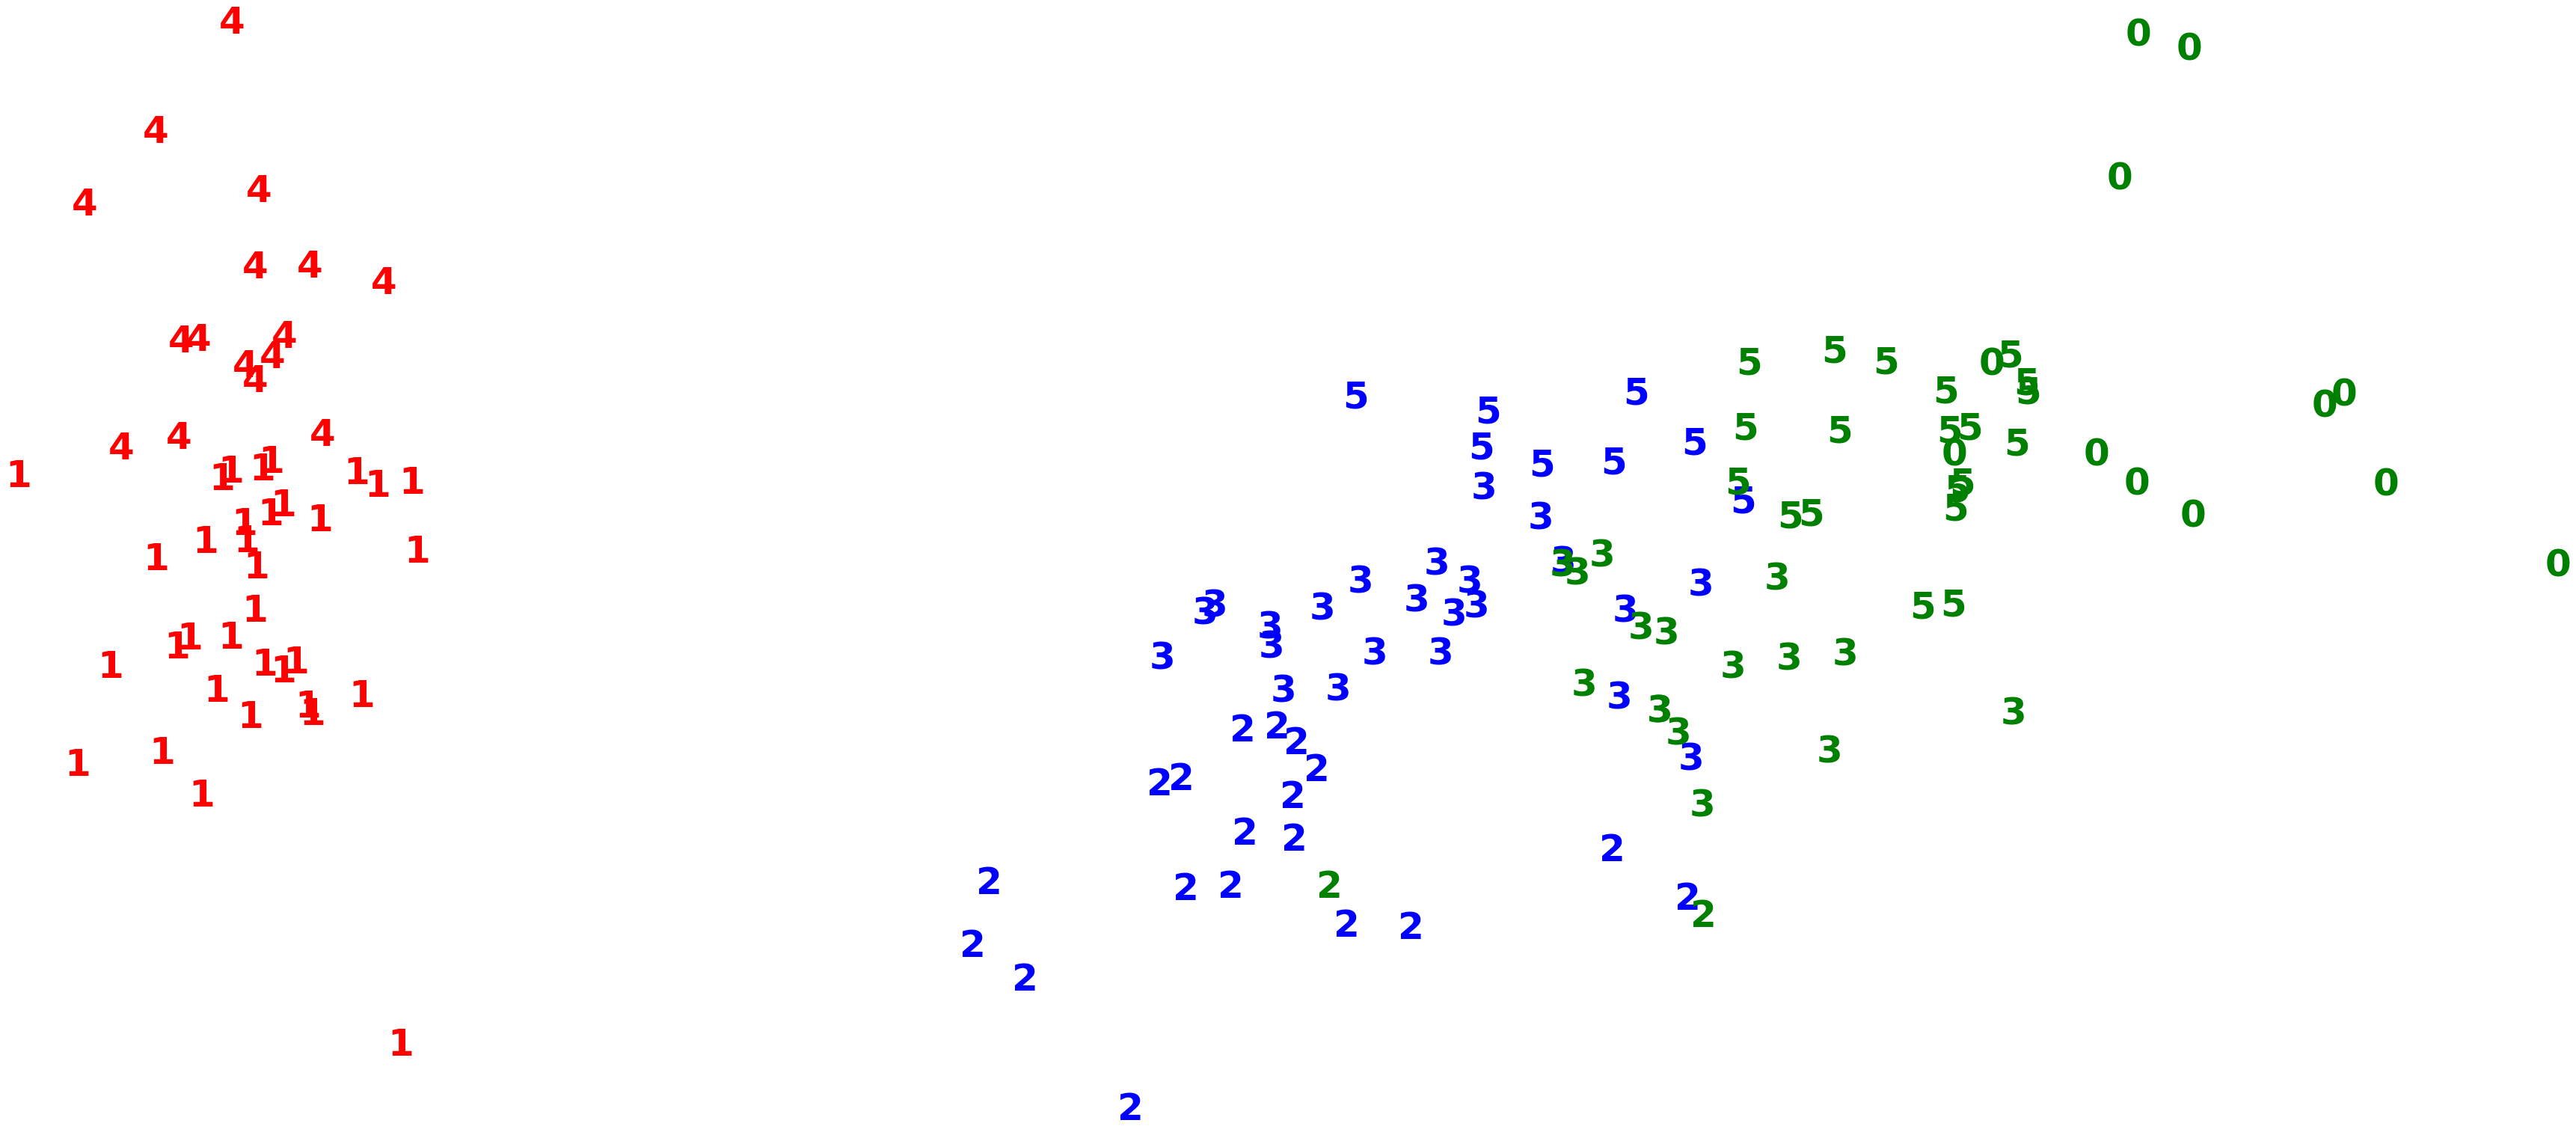

In [26]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

I tried 1-12 and think 3 and 6 are the best options. 6 seems to separate out the red and green groups a littler better than 3 (I can draw a clean line between 2/3 and 5/0), but 3 assigns the linearly separable group to only one group, which is ideal.

## Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [31]:
!pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

  Using cached https://files.pythonhosted.org/packages/13/c3/050b8da85b02886f2c649da42cf195a4dc8cc5770a5524cd5b34c36c03a7/psycopg2_binary-2.8.4-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


In [32]:
from sqlalchemy import create_engine

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease', con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [44]:
heartdisease_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [33]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [34]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [35]:
# Define k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

33.3 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


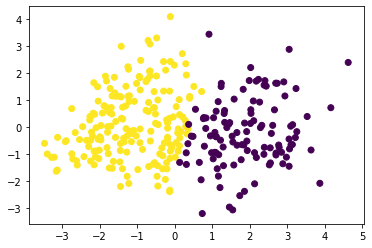

In [40]:
# Use PCA to reduce to two dimensions for visualization
pca = PCA(n_components=2).fit_transform(X_std)

# Plot results
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

In [41]:
# Check the solution
print(pd.crosstab(y_pred, y))

col_0    0    1
row_0          
0      101   13
1       38  151


K-means is correctly classifying 252 out of 303 (83%).